<a href="https://colab.research.google.com/github/janorena/modelado-y-simulacion/blob/master/Ejercicios_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Jorge Andrés Noreña García - 816543

## Ejercicios Capítulo 2.4 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt

In [66]:
#Definimos el método de Runge Kutta de cuarto orden

def rk4( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = func( ti,xi,params)
      k2 = func( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = func( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = func( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x


# Definimos el método de Euler 

def euler( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*func(ti,xi,params)
      ti = ti + h
    return t, x   

In [67]:
def sistema1(t, x, a):
    x_dot = x*(1-x)
    return x_dot

def sistema2(t, x, a):
    x_dot = x*(1-x)*(2-x)
    return x_dot

def sistema3(t, x, a):
    x_dot = np.tan(x)
    return x_dot 

def sistema4(t, x, a):
    x_dot = x**2*(6-x)
    return x_dot  

def sistema5(t, x, a):
    x_dot = 1-(np.e**(-x**2))
    return x_dot    

def sistema6(t, x, a):
    x_dot = np.log(x)
    return x_dot        

def decimal_range(start, stop, increment):
    while start < stop:
        yield start
        start += increment    

# 2.4.1 

### Sistema 1: 

1. \begin{equation}
\dot { x } =x(1-x)
\end{equation}

Se observa que el sistema tiene dos puntos fijos, inestables ubicado en $0$
y un estable en  $1$.
 

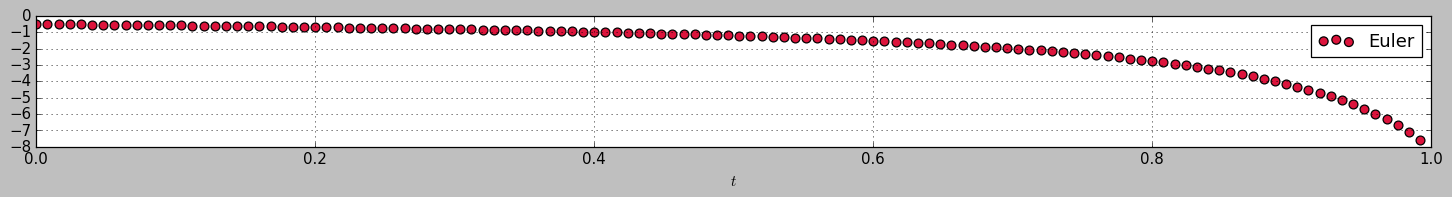

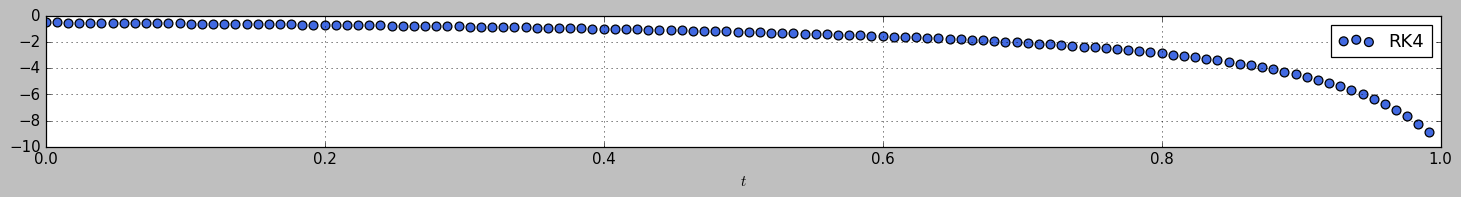

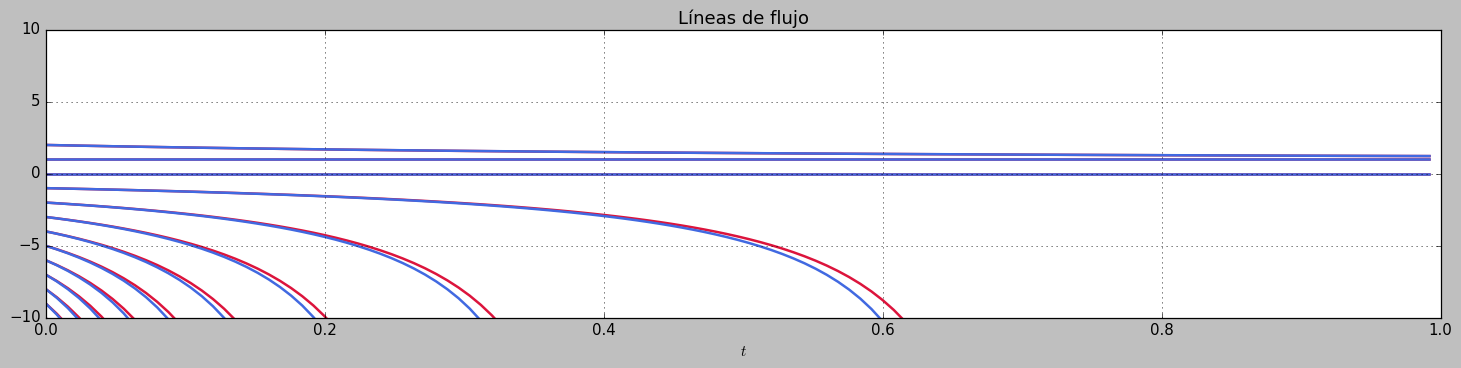

In [68]:
h = 0.008
ti = 0
tf = 1
x0 = -0.5
a = 1

t1,x1 = euler( sistema1, h, ti, tf, x0, a )
t2,x2 = rk4( sistema1, h, ti, tf, x0, a )

#Plot Para la gráfica generada por el método de Euler 
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(211)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#Plot para la gráfica generada por el método de RK4
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(212)
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)
plt.legend(loc = 'best')
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

#Líneas de flujo RK4 y Euler.
plt.figure(figsize=(20, 4), dpi=90)
plt.title('Líneas de flujo')
for i in range(-10,3,1):
    x0=i
    t1,x1 = euler( sistema1, h, ti, tf, x0, a )
    t2,x2 = rk4( sistema1, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)
plt.xlim([0, tf])
plt.ylim([-10, 10])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

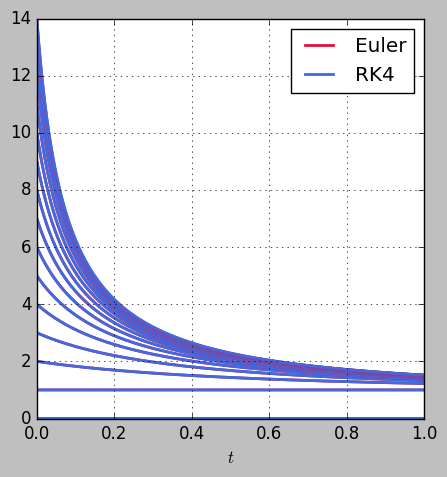

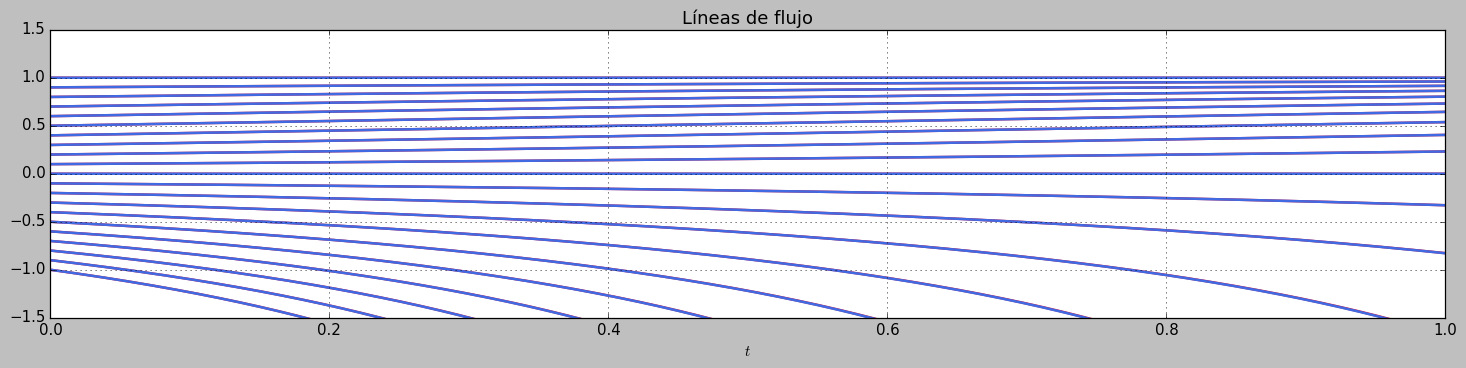

In [69]:
a = 0.5
h = 0.0008
ti = 0
tf = 1
x0 = 0

plt.figure(figsize=(5, 5), dpi=100)
for i in range(0,15,1):
    x0=i
    t1,x1 = euler( sistema1, h, ti, tf, x0 ,a )
    t2,x2 = rk4( sistema1, h, ti, tf, x0 ,a)
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()


#Líneas de flujo RK4 y Euler.
plt.figure(figsize=(20, 4), dpi=90)
plt.title('Líneas de flujo')

for i in decimal_range(-1,1,0.1):
    x0=i
    t1,x1 = euler( sistema1, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
    t2,x2 = rk4( sistema1, h, ti, tf, x0, a )
    plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)

plt.xlim([0, tf])
plt.ylim([-1.5, 1.5])
plt.xlabel(r'$t$')
plt.legend
plt.grid()
plt.show()

## 2.4.2

### Sistema 2: 

2. $\dot { x } = x(1-x)(2-x)$

   Se observa que el sistema tiene tres puntos fijos, inestables ubicado en $0$
y un estable en  $1$ otro inestable en $2$.

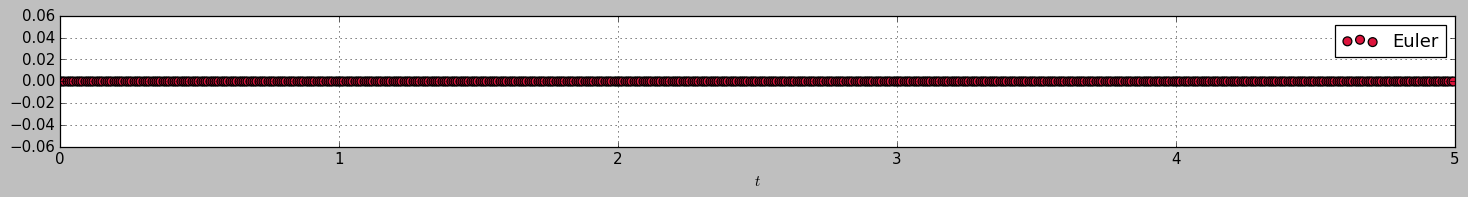

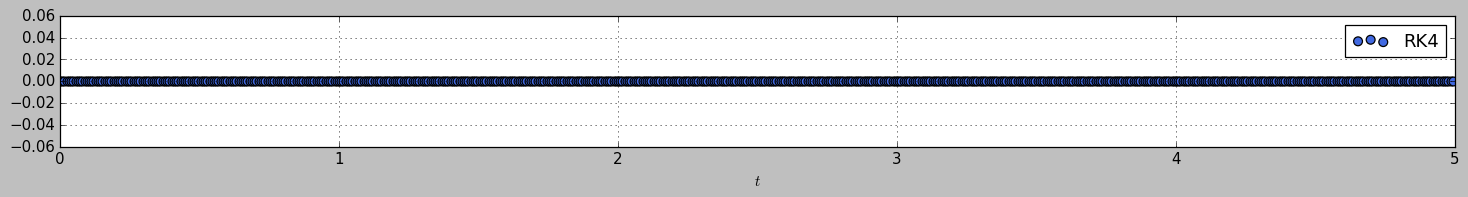

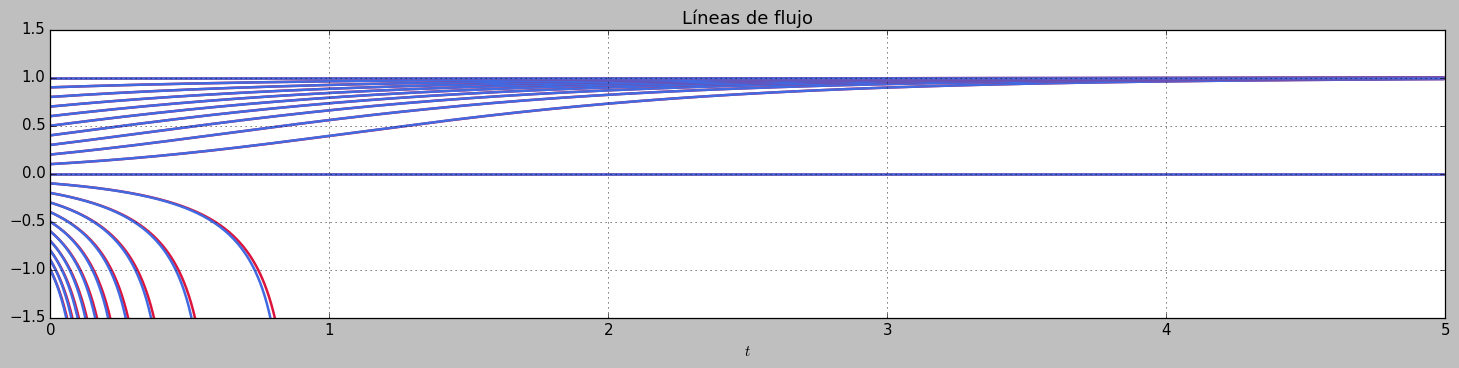

In [70]:
h = 0.008
ti = 0
tf = 5
x0 = 0
a = 2 

t1,x1 = euler( sistema2, h, ti, tf, x0, a )
t2,x2 = rk4( sistema2, h, ti, tf, x0, a )

#Plot Para la gráfica generada por el método de Euler 
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(211)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#Plot para la gráfica generada por el método de RK4
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(212)
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)
plt.legend(loc = 'best')
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

#Líneas de flujo RK4 y Euler.
plt.figure(figsize=(20, 4), dpi=90)
plt.title('Líneas de flujo')

for i in decimal_range(-1,1,0.1):
    x0=i
    t1,x1 = euler( sistema2, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
    t2,x2 = rk4( sistema2, h, ti, tf, x0, a )
    plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)

plt.xlim([0, tf])
plt.ylim([-1.5, 1.5])
plt.xlabel(r'$t$')
plt.legend
plt.grid()
plt.show()

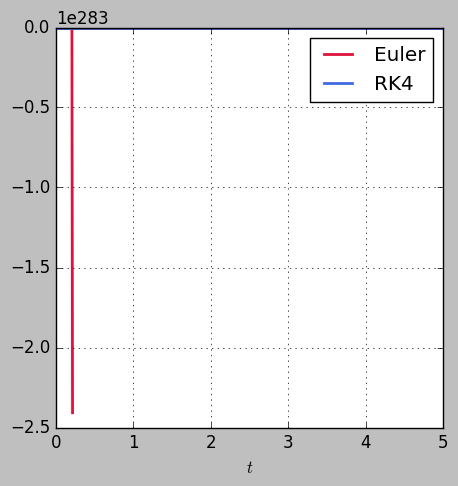

In [86]:
a = 1
h = 0.008
ti = 0
tf = 5
x0 = 0

plt.figure(figsize=(5, 5), dpi=100)
for i in range(-1,1,1):
    x0=i
    t1,x1 = euler( sistema2, h, ti, tf, x0 ,a )
    t2,x2 = rk4( sistema2, h, ti, tf, x0 ,a)
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

## 2.4.3
### Sistema 3: 


3.   $\dot { x } = tan(x)$

es inestable para todos los $X=n*pi$



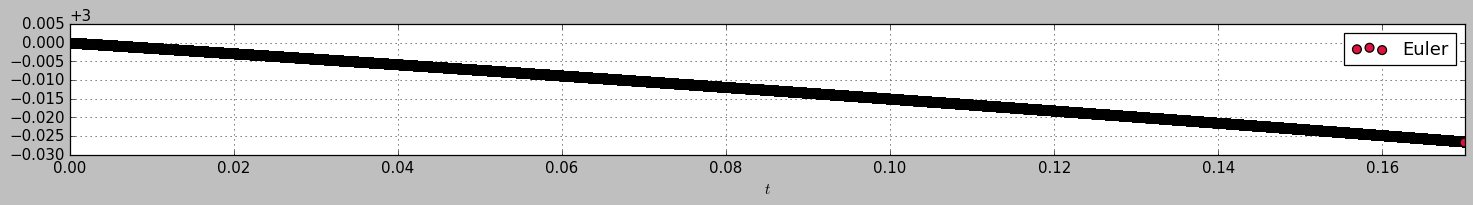

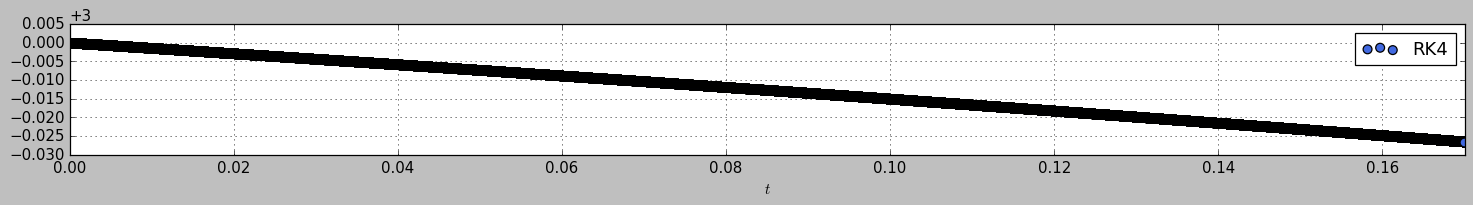

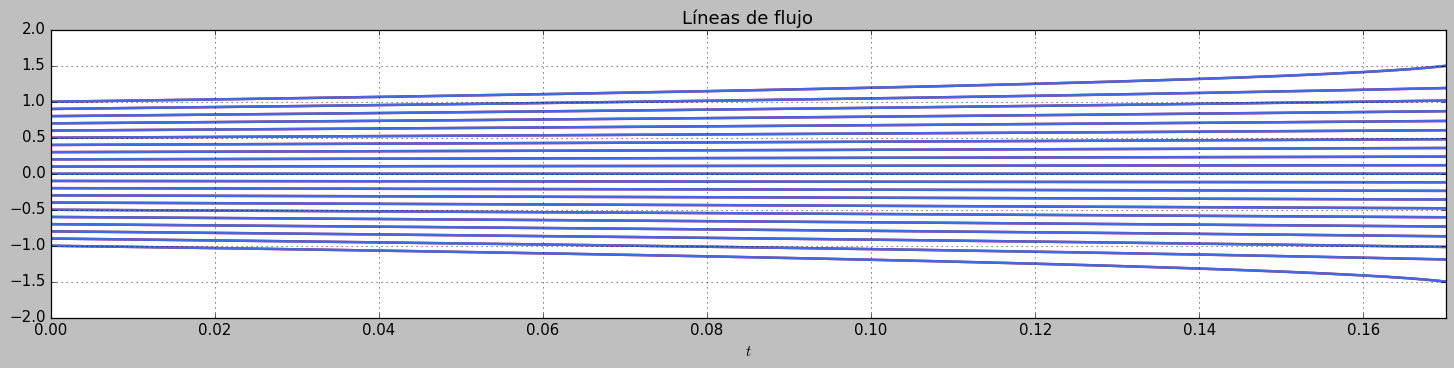

In [84]:
h = 1e-6
ti = 0
tf = 0.17
x0 = 3
a = 0

t1,x1 = euler( sistema3, h, ti, tf, x0, a )
t2,x2 = rk4( sistema3, h, ti, tf, x0, a )

#Plot Para la gráfica generada por el método de Euler 
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(211)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#Plot para la gráfica generada por el método de RK4
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(212)
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)
plt.legend(loc = 'best')
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

#Líneas de flujo RK4 y Euler.
plt.figure(figsize=(20, 4), dpi=90)
plt.title('Líneas de flujo')

for i in decimal_range(-1,1,0.1):
    x0=i
    t1,x1 = euler( sistema3, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
    t2,x2 = rk4( sistema3, h, ti, tf, x0, a )
    plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)

plt.xlim([0, tf])
plt.ylim([-2, 2])
plt.xlabel(r'$t$')
plt.legend
plt.grid()
plt.show()


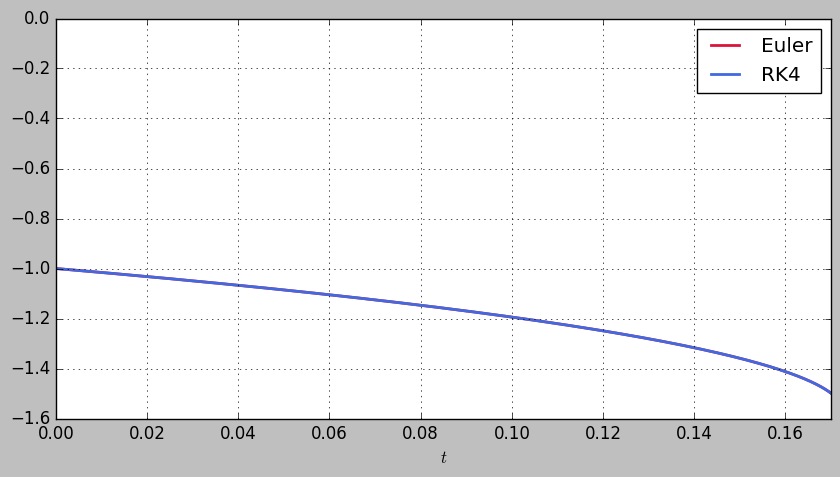

In [83]:
a = 0.5
h = 0.000001
ti = 0
tf = 0.17
x0 = 0.8

plt.figure(figsize=(10, 5), dpi=100)
for i in range(-1,1,1):
    x0=i
    t1,x1 = euler( sistema3, h, ti, tf, x0 ,a )
    t2,x2 = rk4( sistema3, h, ti, tf, x0 ,a)
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

## 2.4.4
### Sistema 4: 

4.   $\dot { x } = x^2*(6-x)$

Se observa que el sistema tiene dos puntos fijos, punto de silla ubicado en $0$
y un estable en  $6$.

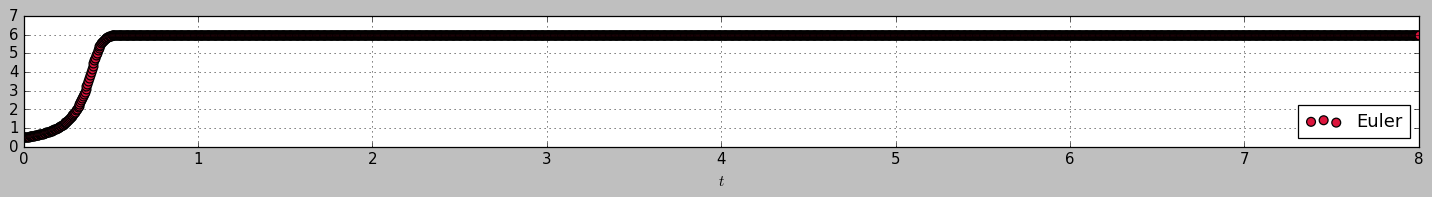

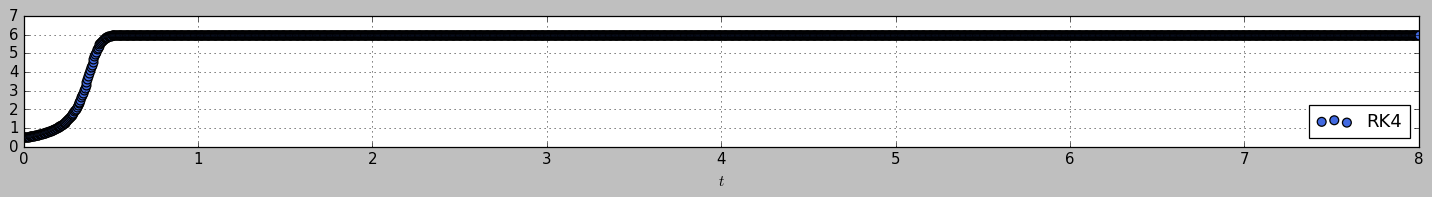

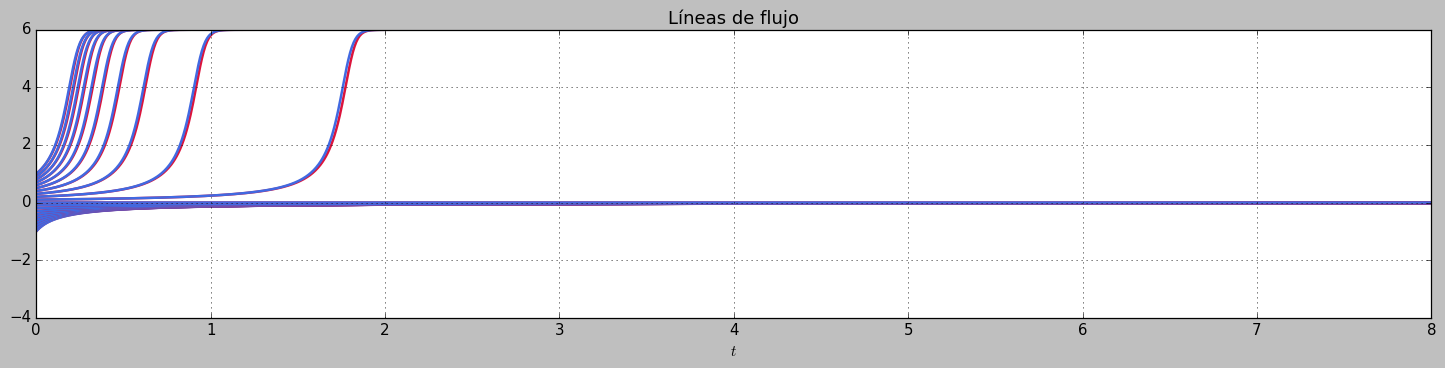

In [74]:
h = 0.005
ti = 0
tf = 8
x0 = 0.5
a = 1 

t1,x1 = euler( sistema4, h, ti, tf, x0, a )
t2,x2 = rk4( sistema4, h, ti, tf, x0, a )

#Plot Para la gráfica generada por el método de Euler 
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(211)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#Plot para la gráfica generada por el método de RK4
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(212)
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)
plt.legend(loc = 'best')
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

#Líneas de flujo RK4 y Euler.
plt.figure(figsize=(20, 4), dpi=90)
plt.title('Líneas de flujo')

for i in decimal_range(-1,1,0.1):
    x0=i
    t1,x1 = euler( sistema4, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
    t2,x2 = rk4( sistema4, h, ti, tf, x0, a )
    plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)

plt.xlim([0, tf])
plt.ylim([-4, 6])
plt.xlabel(r'$t$')
plt.legend
plt.grid()
plt.show()

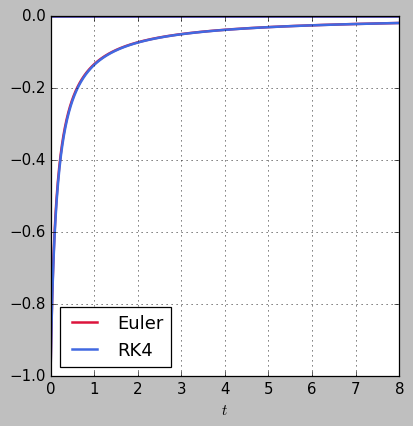

In [75]:
a = 0.5
h = 0.008
ti = 0
tf = 8
x0 = 0.5

plt.figure(figsize=(5, 5), dpi=90)
for i in range(-1,1,1):
    x0=i
    t1,x1 = euler( sistema4, h, ti, tf, x0, a )
    t2,x2 = rk4( sistema4, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

## 2.4.5   
### Sistema 5: 

5.$\dot { x } = 1-(e^{-x^2})$

Se observa que el sistema tiene un punto fijo, el cual es llamado comun mente llamado punto de silla o semiestable $0$.

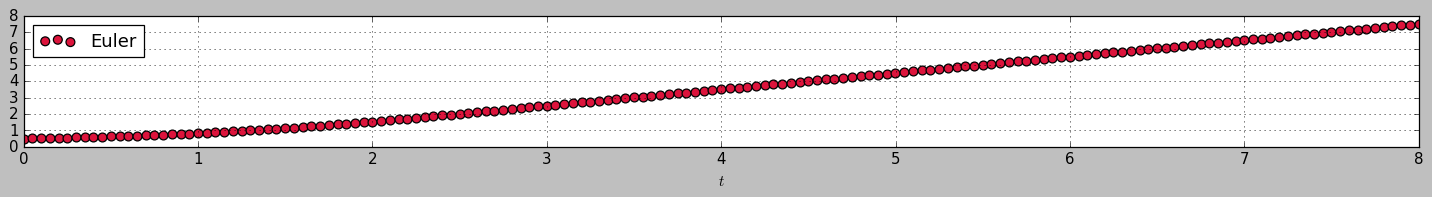

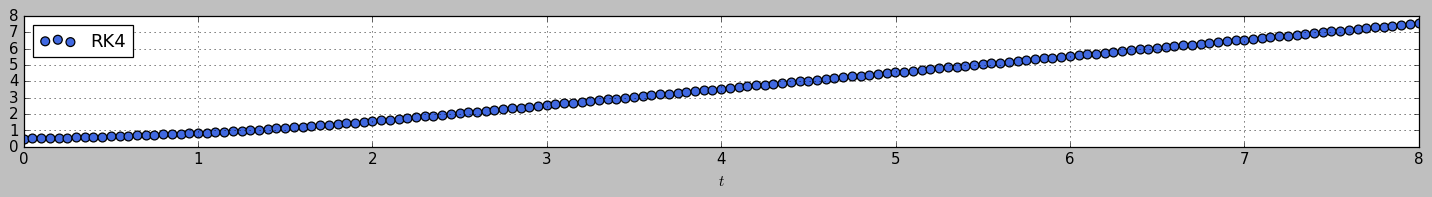

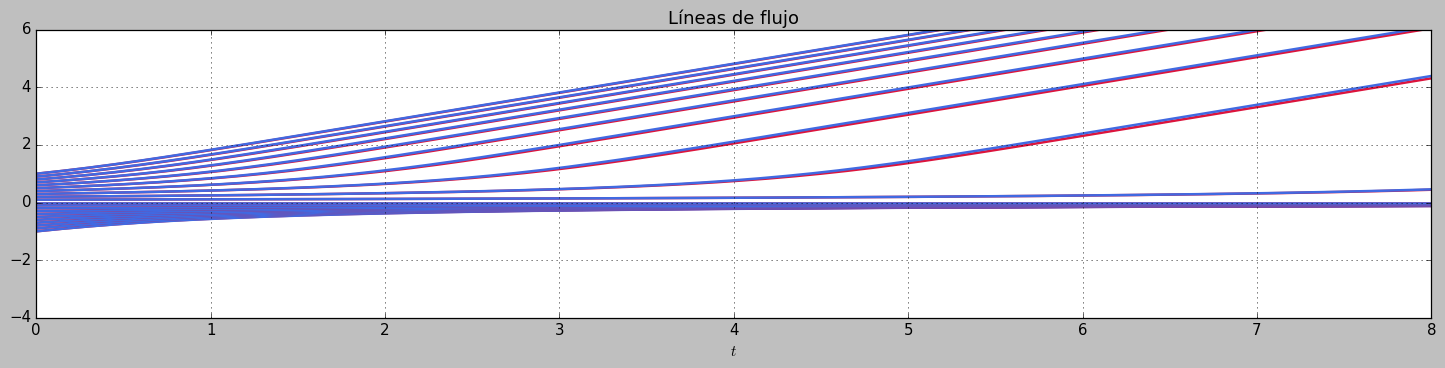

In [76]:
h = 0.05
ti = 0
tf = 8
x0 = 0.5
a = 1 

t1,x1 = euler( sistema5, h, ti, tf, x0, a )
t2,x2 = rk4( sistema5, h, ti, tf, x0, a )

#Plot Para la gráfica generada por el método de Euler 
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(211)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#Plot para la gráfica generada por el método de RK4
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(212)
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)
plt.legend(loc = 'best')
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

#Líneas de flujo RK4 y Euler.
plt.figure(figsize=(20, 4), dpi=90)
plt.title('Líneas de flujo')

for i in decimal_range(-1,1,0.1):
    x0=i
    t1,x1 = euler( sistema5, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
    t2,x2 = rk4( sistema5, h, ti, tf, x0, a )
    plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)

plt.xlim([0, tf])
plt.ylim([-4, 6])
plt.xlabel(r'$t$')
plt.legend
plt.grid()
plt.show()

No handles with labels found to put in legend.


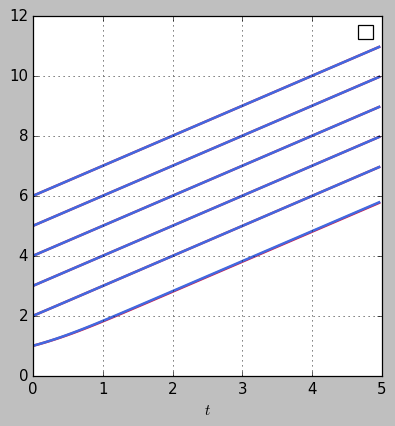

In [77]:
a = 0.5
h = 0.08
ti = 0
tf = 5
x0 = 0.8

plt.figure(figsize=(5, 5), dpi=90)
for i in range(1,7,1):
    x0=i
    t1,x1 = euler( sistema5, h, ti, tf, x0, a )
    t2,x2 = rk4( sistema5, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

### 2.4.6
### Sistema 6: 
 
4. \begin{equation}
\dot { x } =ln{x}
\end{equation}

Se observa que el sistema tiene un punto fijo, inestable ubicado en $1$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log


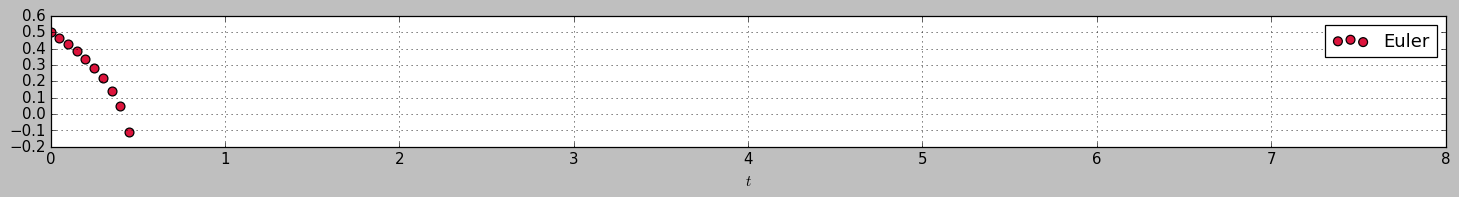

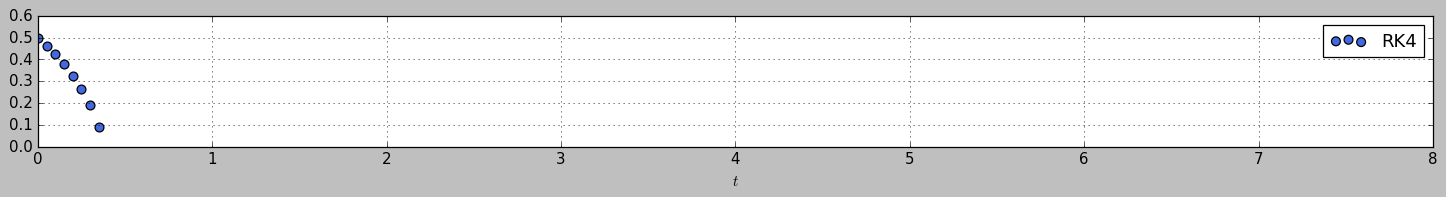

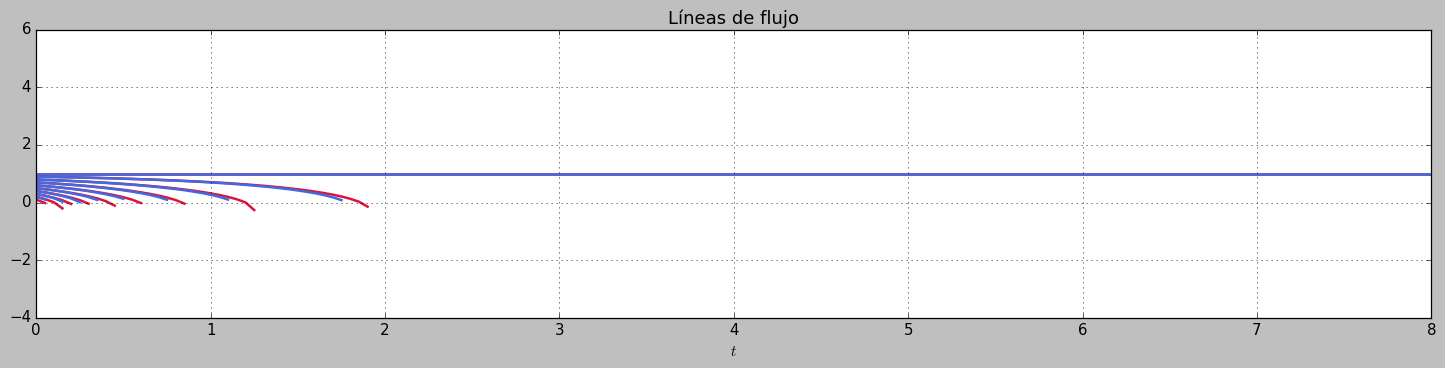

In [78]:
h = 0.05
ti = 0
tf = 8
x0 = 0.5
a = 1 

t1,x1 = euler( sistema6, h, ti, tf, x0, a )
t2,x2 = rk4( sistema6, h, ti, tf, x0, a )

#Plot Para la gráfica generada por el método de Euler 
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(211)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#Plot para la gráfica generada por el método de RK4
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(212)
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)
plt.legend(loc = 'best')
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

#Líneas de flujo RK4 y Euler.
plt.figure(figsize=(20, 4), dpi=90)
plt.title('Líneas de flujo')

for i in decimal_range(-1,1,0.1):
    x0=i
    t1,x1 = euler( sistema6, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
    t2,x2 = rk4( sistema6, h, ti, tf, x0, a )
    plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)

plt.xlim([0, tf])
plt.ylim([-4, 6])
plt.xlabel(r'$t$')
plt.legend
plt.grid()
plt.show()